In [22]:
import matplotlib
matplotlib.use('TkAgg')
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# Specify the root directory where your CSV files are stored
root_dir = "results/recruiting-ocel1"
prediction_task = "remaining_time"


In [29]:
# Fixed variables
fixed_graph_layer = "GAT"
#fixed_embedding_size = 8
fixed_subgraph_size = 11
fixed_node_features = "False"
# fixed_prediction_layer = "Linear models"

In [30]:
# Initialize a dataframe to collect all results
all_results = []

# Walk through the directory and read CSV files
for subdir, _, files in os.walk(os.path.join(root_dir, prediction_task)):
    for file in files:
        if file.endswith(".csv"):
            parts = file.split('_')
            graph_layer, embedding_size, node_features = parts[0], int(parts[1]), parts[2].replace('.csv', '')
            subgraph_size = int(os.path.basename(subdir))

            if (graph_layer == fixed_graph_layer and subgraph_size == fixed_subgraph_size and node_features == fixed_node_features):

                # Read the entire CSV file and drop empty rows
                df = pd.read_csv(os.path.join(subdir, file)).dropna()
        
                # Select the best score (minimum) for each prediction layer
                best_results = df.groupby('prediction_layer', as_index=False)['score'].min()
        
                # Collect results
                for _, row in best_results.iterrows():
                    all_results.append({
                        'subgraph_size': subgraph_size,
                        'graph_layer': graph_layer,
                        'embedding_size': int(embedding_size),
                        'node_features': node_features,
                        'prediction_layer': row['prediction_layer'],
                        'score': float(row['score'])
                    })

# Convert to DataFrame for easier plotting
results_df = pd.DataFrame(all_results)
results_df.head()

,subgraph_size,graph_layer,embedding_size,node_features,prediction_layer,score
0,11,GAT,16,False,Linear models,14.757791
1,11,GAT,16,False,MLP_32_1,15.444418
2,11,GAT,16,False,MLP_32_4,14.525192
3,11,GAT,16,False,MLP_8_1,16.948131
4,11,GAT,16,False,MLP_8_4,14.700756


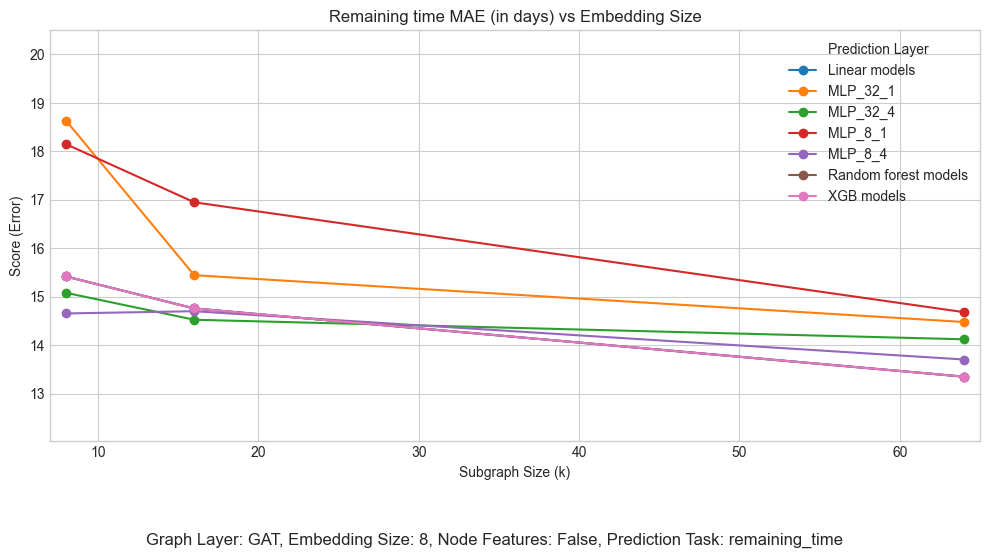

In [31]:
# Plotting
plt.figure(figsize=(10, 5))
for prediction_layer in results_df['prediction_layer'].unique():
    subset = results_df[results_df['prediction_layer'] == prediction_layer].sort_values('embedding_size')
    # Interpolating for a smoother curve
    x_vals = subset['embedding_size']
    y_vals = subset['score']
    plt.plot(x_vals, y_vals, marker='o', label=prediction_layer)

# Apply consistent scale and background
plt.ylim(results_df['score'].min() * 0.9, results_df['score'].max() * 1.1)
plt.xlim(results_df['embedding_size'].min()-1, results_df['embedding_size'].max()+1)
plt.style.use('seaborn-v0_8-whitegrid')  # Consistent background style

# Adding the caption with fixed variables
caption = (f"Graph Layer: {fixed_graph_layer}, Embedding Size: {fixed_embedding_size}, "
           f"Node Features: {fixed_node_features}, Prediction Task: {prediction_task}")
plt.figtext(0.5, -0.1, caption, wrap=True, horizontalalignment='center', fontsize=12)

plt.xlabel("Subgraph Size (k)")
plt.ylabel("Score (Error)")
plt.title("Remaining time MAE (in days) vs Embedding Size")
plt.legend(title="Prediction Layer")
plt.tight_layout()
plt.show()
